# Ford Go Bike Data Visualization and Analysis
## by Adaobi Onyeakagbu

## Investigation Overview

> In this investigation, I wanted to look at the trends of the different types of users hourly, daily, monthly and per station. The main focus was on the two types of users: subscribers and customers.

## Dataset Overview

> Ford GoBike is a company that provides on-demand bike rentals for customers in the Bay Area. The data consisted of 13 initial variables for data entries in 2017, 2018, 2019 and January-March 2020. All the tables were merged and a 10% fraction of the entire set was finally used to get representation for each year and wrangling was done. The resulting dataset consisted of 512788 instances and 19 attributes.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
gobike= pd.read_csv('gobike_master.csv')

## Total bike rides per user type

The Ford Gobike sharing system offers users the opportunity to use the service by either getting a monthly subscription or use the system with passes as Customers. The plot below shows that 78% of bike rides represented are Subscribers while 22% are Customers. Therefore there are more people subscribed to the service than casual riders.

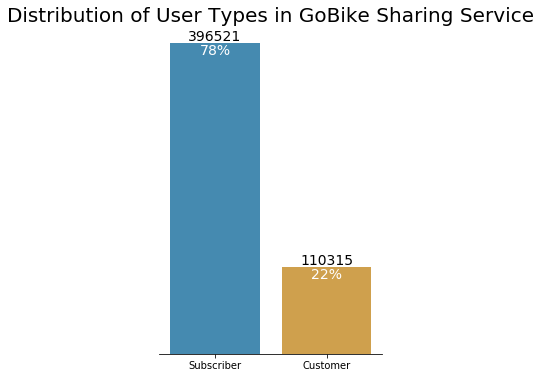

In [5]:
fig, ax = plt.subplots(figsize = (4,6))
sb.countplot(x = "user_type", data = gobike, 
              order = gobike['user_type'].value_counts().index,
              palette = sb.color_palette('colorblind'), alpha=0.8)
percentage = []
type_sum = gobike['user_type'].value_counts().to_list()
total_sum = gobike.shape[0]

for i in range(0,len(type_sum)):
    percent = int(round(100 * type_sum[i] / total_sum))
    percentage.append(percent) 
i=0
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=14)
    ax.annotate('{:.0f}%'.format(percentage[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="top", color='white', size=14)
    i+=1

plt.title('Distribution of User Types in GoBike Sharing Service', size=20)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sb.despine(fig, left = True)
plt.xlabel("");

## User distribution per hour
Hourly distribution follows fairly the same pattern of spiking at 7-9am and again at 4-6pm (general times for start and end of work) for both types of users, but Customers appear to also use the service outside these times more than than Subscribers do. Subscribers might be using the service for commute to work while Customers might be using it for leisure.

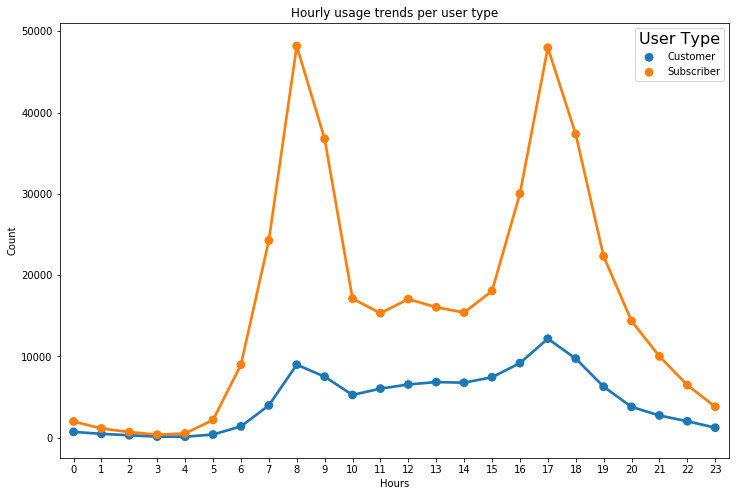

In [9]:
user_time = gobike.groupby(["time_of_day", "user_type"]).size().reset_index()
plt.figure(figsize=(12,8))
ax = sb.pointplot(x='time_of_day', y=0, hue='user_type', data=user_time)
plt.title('Hourly usage trends per user type')
plt.xlabel('Hours')
plt.ylabel('Count')
leg = ax.legend()
leg.set_title('User Type',prop={'size':16});

## User distribution per day
On a daily basis, Subscribers use the service typically on weekdays and much less on weekends while Customers use the service on weekends as much as they do on weekdays. 

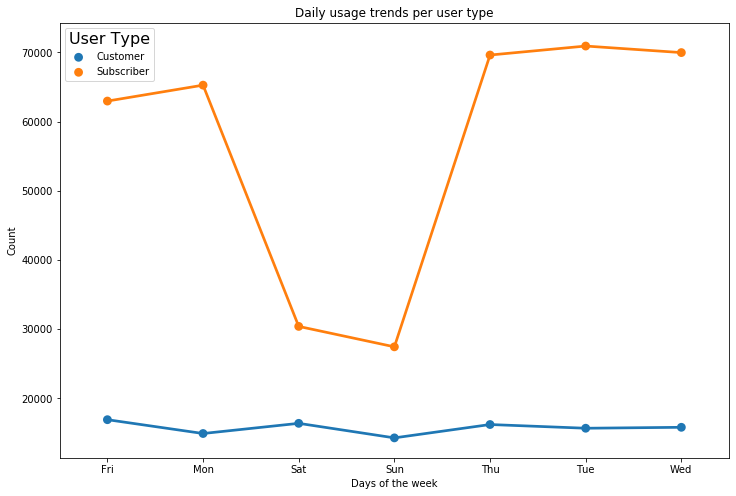

In [11]:

user_day = gobike.groupby(["day_of_week", "user_type"]).size().reset_index()
plt.figure(figsize=(12,8))
ax = sb.pointplot(x='day_of_week', y=0, hue='user_type', data=user_day)
plt.title('Daily usage trends per user type')
plt.xlabel('Days of the week')
plt.ylabel('Count')
leg = ax.legend()
leg.set_title('User Type',prop={'size':16});

## User distribution per month
The monthly distribution for user types varies quite a lot. While October and December has the highest and lowest patronage respectively for Subscribers, Customers appear to use the service most in February and least in May.

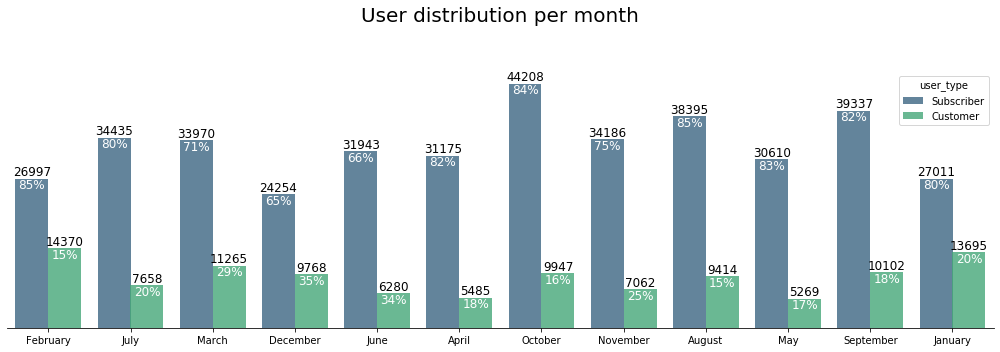

In [10]:
fig, ax = plt.subplots(figsize = (14,5))
sb.countplot(x = "ride_month", data = gobike, 
              palette = "viridis", hue = "user_type", alpha = 0.8)
cust_list, subs_list, percentage = [], [], []
type_sum = gobike.groupby('ride_month')['user_type'].value_counts().sort_index().to_list()
total_sum = gobike['ride_month'].value_counts().sort_index().to_list()

for i in range(0,len(total_sum)):
    cust = int(round(100 * type_sum[2*i] / total_sum[i]))
    cust_list.append(cust)
for i in range(0,len(total_sum)):
    subs = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    subs_list.append(subs)
percentage = subs_list + cust_list

i=0
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=12)
    ax.annotate('{:.0f}%'.format(percentage[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="top", color='white', size=12)
    i+=1

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sb.despine(fig, left = True)
plt.title("User distribution per month\n\n", fontsize= 20)
plt.xlabel("")
plt.tight_layout();

## Average trip duration per User
Though users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge, Subscribers still use an average of 10 minutes per ride. Customer appear to be using the bike sharing service for longer durations on the average than Subscribers. 

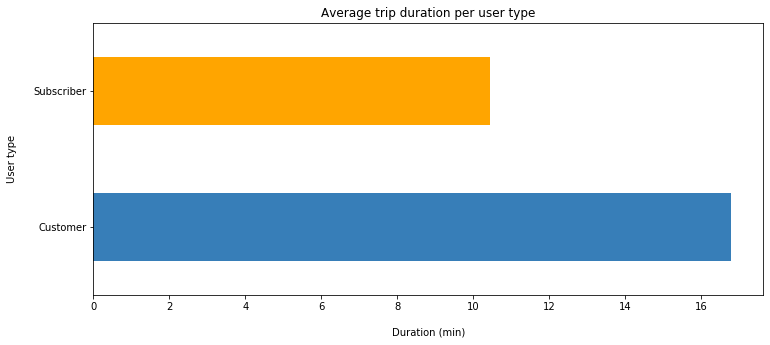

In [23]:

ax = gobike.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=['#377eb8', 'orange'], figsize=(12,5))
ax.set_title('Average trip duration per user type')
ax.set_ylabel('User type', labelpad=16)
ax.set_xlabel('Duration (min)', labelpad=16);


## Distribution of hourly and daily usage per user type
Comparing hourly and daily distributions, Subscribers tend to use the service mostly during 7-9 am and 4-6pm on weekdays than any other time. Customer also appear to use the service during these times, but also at midday on weekends. This demonstrates that Subscribers are probably using the service more routinely for work purposes while Customers use it for work and leisure.

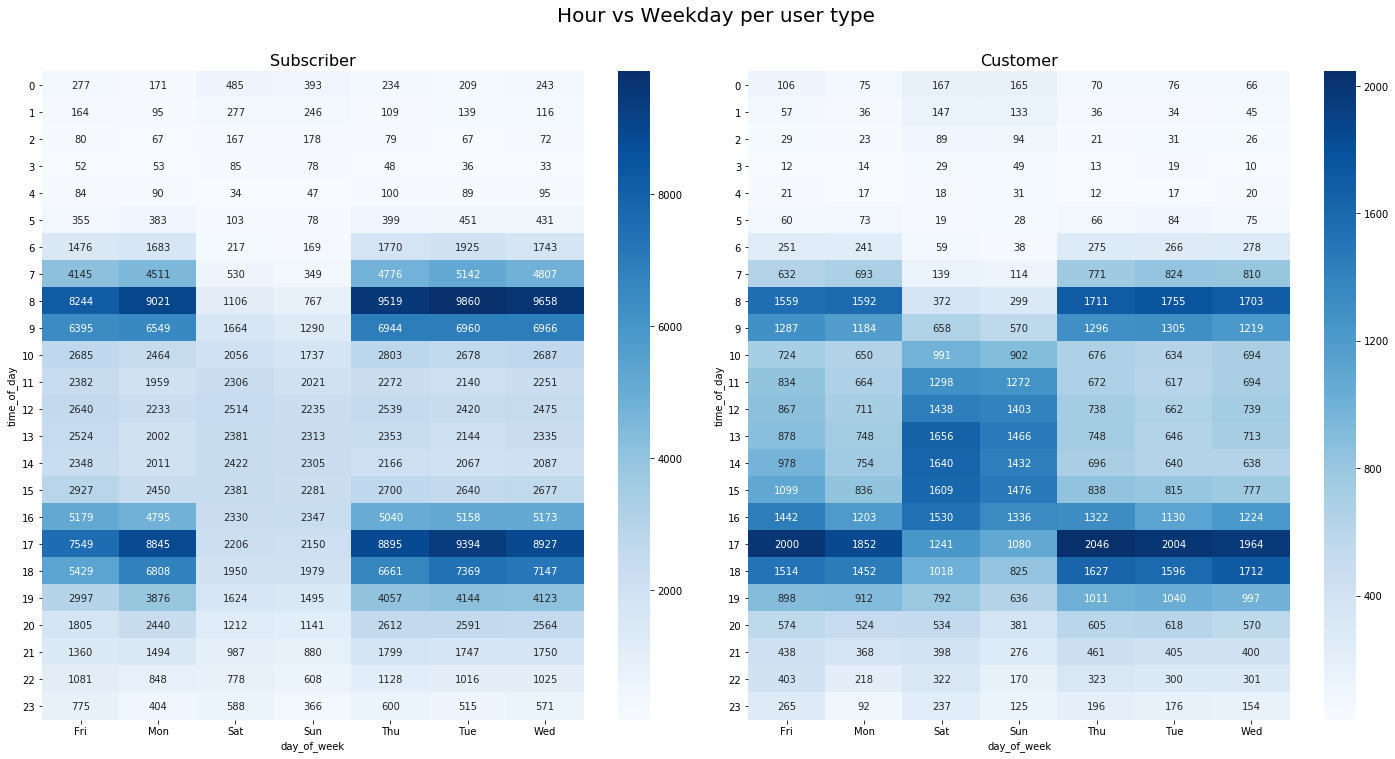

In [24]:
sub_df = gobike.query('user_type == "Subscriber"').groupby(['time_of_day','day_of_week']).agg({'bike_id' : 'count'})
sub_df = sub_df.pivot_table(index='time_of_day', columns='day_of_week', values='bike_id')
cus_df = gobike.query('user_type == "Customer"').groupby(['time_of_day','day_of_week']).agg({'bike_id' : 'count'})
cus_df = cus_df.pivot_table(index='time_of_day', columns='day_of_week', values='bike_id')

plt.subplots(figsize=(20,10))

fig1 = plt.subplot(1,2,1)
ax1 = sb.heatmap(sub_df, annot=True, fmt='d', cmap='Blues')
plt.title('Subscriber',size=16)
plt.yticks(rotation=360)

fig2 = plt.subplot(1,2,2)
ax2 = sb.heatmap(cus_df, annot=True, fmt='d', cmap='Blues')
plt.title('Customer',size=16)
plt.yticks(rotation=360)
plt.suptitle("Hour vs Weekday per user type", size=20, y=1.05)
plt.tight_layout();

## Conclusion
Subscribers constitute more of the users than customers and they have short trip durations on the average and follow routine-like patterns for work purposes. Customers however are using the service for longer durations on the average and appear to use the service mostly for leisure.

In [ ]:
jupyter nbconvert gobike_slide_deck.ipynb --to slides --post serve --template output_toggle